## Πανεπιστήμιο Δυτικής Αττικής

## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής

## Μηχανική Μάθηση- Ανάλυση Μεγάλων Δεδομένων 

   
   
   # Wine Quality





                                                                                                  ΙΩΑΝΝΙΔΗΣ ΠΕΤΡΟΣ 71444277

## ΕΙΣΑΓΩΓΗ

Η κατανάλωση κρασιού ήταν ανέκαθεν βασικό στοιχείο της ανθρωπότητας. Στην αρχαία Ελλάδα για παράδειγμα, πλούσιοι άντρες στα συμπόσια έπιναν κρασί και συζητούσαν διάφορα θέματα από την πολιτική και τη φιλοσοφία έως τη λογοτεχνία και
ποίηση. Η εκλεκτή παραγωγή κρασιού είναι μια λεπτή διαδικασία με πολλές μεταβλητές. Στόχος μας σε αυτήν την εργασία είναι να αξιολογήσουμε την ποιότητα του κρασιού με βάση διάφορα φυσικοχημικά χαρακτηριστικά, τα οποία παρουσιάζονται παρακάτω. Για το σκοπό αυτό θα χρησιμοποιήσουμε το σύνολο δεδομένων του πορτογαλικού κόκκινου κρασιού, "Vinho Verde". Τα διαθέσιμα χαρακτηριστικά του σ'αυτό το σύνολο δεδομένων είναι:

                            1. Fixed Acidity (g(tartaric acid)/dm3)
                            2. Volatile Acidity (g(acetic acid)/dm3)
                            3. Citric Acid (g/dm3)
                            4. Residual Sugar (g/dm3)
                            5. Chlorides (g(sodium chloride)/dm3)
                            6. Free Sulfur Dioxide (mg/dm3)
                            7. Total Sulfur Dioxide (mg/dm3)
                            8. Density (g/cm3)
                            9. pH
                            10. Sulphates (g(potassium sulphate)/dm3)
                            11. Alcohol (vol%)

Με βάση τα παραπάνω φυσικοχημικά χαρακτηριστικά και με τις τεχνικές μηχανικής μάθησης που έχουμε μάθει, θα μπορούμε να προβλέψουμε την ποιότητα(quality) του κάθε κρασιού.
Είναι τεράστιο το όφελος της μηχανικής μάθησης για ενα τέτοιο σύνολο δεδομένων όπου έχουμε να μελετήσουμε 1599 κρασιά για 12 διαφορετικά χαρακτηριστηκά τους.Όπως γίνεται αντιληπτό θα ήταν σχεδόν αδύνατον να κάνουμε την πρόβλεψη μόνοι μας,χωρίς τις μεθόδους μηχανικής μάθησης που έχουμε μάθει.
Γι αυτόν τον λόγο θα κάνουμε κατηγοριοποίηση του συγκεκριμένου dataset με την βοήθεια των αλγορίθμων Δέντρο απόφασης και K κοντινότερους γείτονες για να ελέγξουμε ποιός θα μας δώσει το καλύτερο αποτέλεσεμα σύμφωνα τα κριτήρια αξιολόγησης τους.

## Classification

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
data=pd.read_csv('data/winequality-red.txt')

### Το dataset που χρησιμοποιούμε αποτελείται απο 1599 κρασία και 12 χαρακτηριστικά εκ των οποίων το 1 είναι το quality

In [3]:
data.shape

(1599, 12)

### Παρατηρούμε οτι όλα τα χαρακτηριστικά είναι συνεχή δηλαδή μας νοιάζουν σαν ποσότητες όπως είναι το alcochol,density κλπ, πέρα απο το quality όπου είναι κατηγορηματικό

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        1599 non-null   float64
 1   volatileacidity     1599 non-null   float64
 2   citricacid          1599 non-null   float64
 3   residualsugar       1599 non-null   float64
 4   chlorides           1599 non-null   float64
 5   freesulfurdioxide   1599 non-null   float64
 6   totalsulfurdioxide  1599 non-null   float64
 7   density             1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   sulphates           1599 non-null   float64
 10  alcohol             1599 non-null   float64
 11  quality             1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.head()

fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0           7.4             0.70        0.00            1.9      0.076   
1           7.8             0.88        0.00            2.6      0.098   
2           7.8             0.76        0.04            2.3      0.092   
3          11.2             0.28        0.56            1.9      0.075   
4           7.4             0.70        0.00            1.9      0.076   

   freesulfurdioxide  totalsulfurdioxide  density    pH  sulphates  alcohol  \
0               11.0                34.0   0.9978  3.51       0.56      9.4   
1               25.0                67.0   0.9968  3.20       0.68      9.8   
2               15.0                54.0   0.9970  3.26       0.65      9.8   
3               17.0                60.0   0.9980  3.16       0.58      9.8   
4               11.0                34.0   0.9978  3.51       0.56      9.4   

   quality  
0        5  
1        5  
2        5  
3        6  
4        5

### Πρωτού περάσουμε σε περισσότερη ανάλυση πρέπει πρώτα να τσεκάρουμε αν υπάρχει κάποιο σφάλμα στα δεδομένα μας

In [6]:
data.isnull().any()

fixedacidity          False
volatileacidity       False
citricacid            False
residualsugar         False
chlorides             False
freesulfurdioxide     False
totalsulfurdioxide    False
density               False
pH                    False
sulphates             False
alcohol               False
quality               False
dtype: bool

In [7]:
data.describe(include='all')

fixedacidity  volatileacidity   citricacid  residualsugar    chlorides  \
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   
50%        7.900000         0.520000     0.260000       2.200000     0.079000   
75%        9.200000         0.640000     0.420000       2.600000     0.090000   
max       15.900000         1.580000     1.000000      15.500000     0.611000   

       freesulfurdioxide  totalsulfurdioxide      density           pH  \
count        1599.000000         1599.000000  1599.000000  1599.000000   
mean           15.874922           46.467792     0.996747     3.311113   
std            10.460157           32.895324     0.001887     0.154386   
min             1.000000            6.000000     0.990070     2.740000   
25%             7.000000           22.000000     0.995600     3.210000   
50%            14.000000           38.000000     0.996750     3.310000   
75%            21.000000           62.000000     0.997835     3.400000   
max            72.000000          289.000000     1.003690     4.010000   

         sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  
mean      0.658149    10.422983     5.636023  
std       0.169507     1.065668     0.807569  
min       0.330000     8.400000     3.000000  
25%       0.550000     9.500000     5.000000  
50%       0.620000    10.200000     6.000000  
75%       0.730000    11.100000     6.000000  
max       2.000000    14.900000     8.000000

### Μας ενδιαφέρει περισσότερο να μελετήσουμε τα 'κακά' κρασιά βάση ποιότητας (quality=3) και τα 'καλά' κρασιά βάση καλής ποιότητας (quality=8)

In [8]:
data3 = data[data.quality==3]
data3.describe(include = 'all')

fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
count     10.000000        10.000000   10.000000      10.000000  10.000000   
mean       8.360000         0.884500    0.171000       2.635000   0.122500   
std        1.770875         0.331256    0.250664       1.401596   0.066241   
min        6.700000         0.440000    0.000000       1.200000   0.061000   
25%        7.150000         0.647500    0.005000       1.875000   0.079000   
50%        7.500000         0.845000    0.035000       2.100000   0.090500   
75%        9.875000         1.010000    0.327500       3.100000   0.143000   
max       11.600000         1.580000    0.660000       5.700000   0.267000   

       freesulfurdioxide  totalsulfurdioxide    density         pH  sulphates  \
count          10.000000           10.000000  10.000000  10.000000   10.00000   
mean           11.000000           24.900000   0.997464   3.398000    0.57000   
std             9.763879           16.828877   0.002002   0.144052    0.12202   
min             3.000000            9.000000   0.994710   3.160000    0.40000   
25%             5.000000           12.500000   0.996150   3.312500    0.51250   
50%             6.000000           15.000000   0.997565   3.390000    0.54500   
75%            14.500000           42.500000   0.998770   3.495000    0.61500   
max            34.000000           49.000000   1.000800   3.630000    0.86000   

         alcohol  quality  
count  10.000000     10.0  
mean    9.955000      3.0  
std     0.818009      0.0  
min     8.400000      3.0  
25%     9.725000      3.0  
50%     9.925000      3.0  
75%    10.575000      3.0  
max    11.000000      3.0

### Παρατηρήσαμε πως λίγα κρασιά έχουν καλή ποιότητα (quality=8) οπότε θα αναλύσουμε τα συγκεκριμένα ξεχωριστά

In [9]:
data8 = data[data.quality==8]
data8.describe(include = 'all')

fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
count     18.000000        18.000000   18.000000      18.000000  18.000000   
mean       8.566667         0.423333    0.391111       2.577778   0.068444   
std        2.119656         0.144914    0.199526       1.295038   0.011678   
min        5.000000         0.260000    0.030000       1.400000   0.044000   
25%        7.250000         0.335000    0.302500       1.800000   0.062000   
50%        8.250000         0.370000    0.420000       2.100000   0.070500   
75%       10.225000         0.472500    0.530000       2.600000   0.075500   
max       12.600000         0.850000    0.720000       6.400000   0.086000   

       freesulfurdioxide  totalsulfurdioxide    density         pH  sulphates  \
count          18.000000           18.000000  18.000000  18.000000  18.000000   
mean           13.277778           33.444444   0.995212   3.267222   0.767778   
std            11.155613           25.433240   0.002378   0.200640   0.115379   
min             3.000000           12.000000   0.990800   2.880000   0.630000   
25%             6.000000           16.000000   0.994175   3.162500   0.690000   
50%             7.500000           21.500000   0.994940   3.230000   0.740000   
75%            16.500000           43.000000   0.997200   3.350000   0.820000   
max            42.000000           88.000000   0.998800   3.720000   1.100000   

         alcohol  quality  
count  18.000000     18.0  
mean   12.094444      8.0  
std     1.224011      0.0  
min     9.800000      8.0  
25%    11.325000      8.0  
50%    12.150000      8.0  
75%    12.875000      8.0  
max    14.000000      8.0

In [10]:
data[data.quality==8]

fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
267            7.9             0.35        0.46            3.6      0.078   
278           10.3             0.32        0.45            6.4      0.073   
390            5.6             0.85        0.05            1.4      0.045   
440           12.6             0.31        0.72            2.2      0.072   
455           11.3             0.62        0.67            5.2      0.086   
481            9.4             0.30        0.56            2.8      0.080   
495           10.7             0.35        0.53            2.6      0.070   
498           10.7             0.35        0.53            2.6      0.070   
588            5.0             0.42        0.24            2.0      0.060   
828            7.8             0.57        0.09            2.3      0.065   
1061           9.1             0.40        0.50            1.8      0.071   
1090          10.0             0.26        0.54            1.9      0.083   
1120           7.9             0.54        0.34            2.5      0.076   
1202           8.6             0.42        0.39            1.8      0.068   
1269           5.5             0.49        0.03            1.8      0.044   
1403           7.2             0.33        0.33            1.7      0.061   
1449           7.2             0.38        0.31            2.0      0.056   
1549           7.4             0.36        0.30            1.8      0.074   

      freesulfurdioxide  totalsulfurdioxide  density    pH  sulphates  \
267                15.0                37.0  0.99730  3.35       0.86   
278                 5.0                13.0  0.99760  3.23       0.82   
390                12.0                88.0  0.99240  3.56       0.82   
440                 6.0                29.0  0.99870  2.88       0.82   
455                 6.0                19.0  0.99880  3.22       0.69   
481                 6.0                17.0  0.99640  3.15       0.92   
495                 5.0                16.0  0.99720  3.15       0.65   
498                 5.0                16.0  0.99720  3.15       0.65   
588                19.0                50.0  0.99170  3.72       0.74   
828                34.0                45.0  0.99417  3.46       0.74   
1061                7.0                16.0  0.99462  3.21       0.69   
1090               42.0                74.0  0.99451  2.98       0.63   
1120                8.0                17.0  0.99235  3.20       0.72   
1202                6.0                12.0  0.99516  3.35       0.69   
1269               28.0                87.0  0.99080  3.50       0.82   
1403                3.0                13.0  0.99600  3.23       1.10   
1449               15.0                29.0  0.99472  3.23       0.76   
1549               17.0                24.0  0.99419  3.24       0.70   

      alcohol  quality  
267      12.8        8  
278      12.6        8  
390      12.9        8  
440       9.8        8  
455      13.4        8  
481      11.7        8  
495      11.0        8  
498      11.0        8  
588      14.0        8  
828      12.7        8  
1061     12.5        8  
1090     11.8        8  
1120     13.1        8  
1202     11.7        8  
1269     14.0        8  
1403     10.0        8  
1449     11.3        8  
1549     11.4        8

### Παρακάτω θα δούμε τον αριθμό κρασιών που αντιστοιχεί σε κάθε βαθμολογία ποιότητας καθώς και ενα γράφημα της ευεξάτμιστης οξύτητας σε συνάρτηση με την σταθερή οξύτητα

In [11]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Grafima fixed acidity vs volatile acidity')

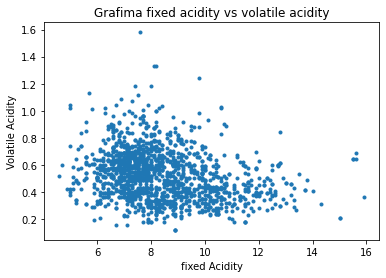

In [12]:
plt.plot(data.fixedacidity,data.volatileacidity,ls ='', marker='.')
plt.xlabel('fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Grafima fixed acidity vs volatile acidity')

### Επίσης εμφανίζουμε γραφήματα για το κάθε χαρακτηριστικό ξεχωριστά σε συνάρτηση με τον αριθμό των κρασιών

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E84FB65610>,
      dtype=object)

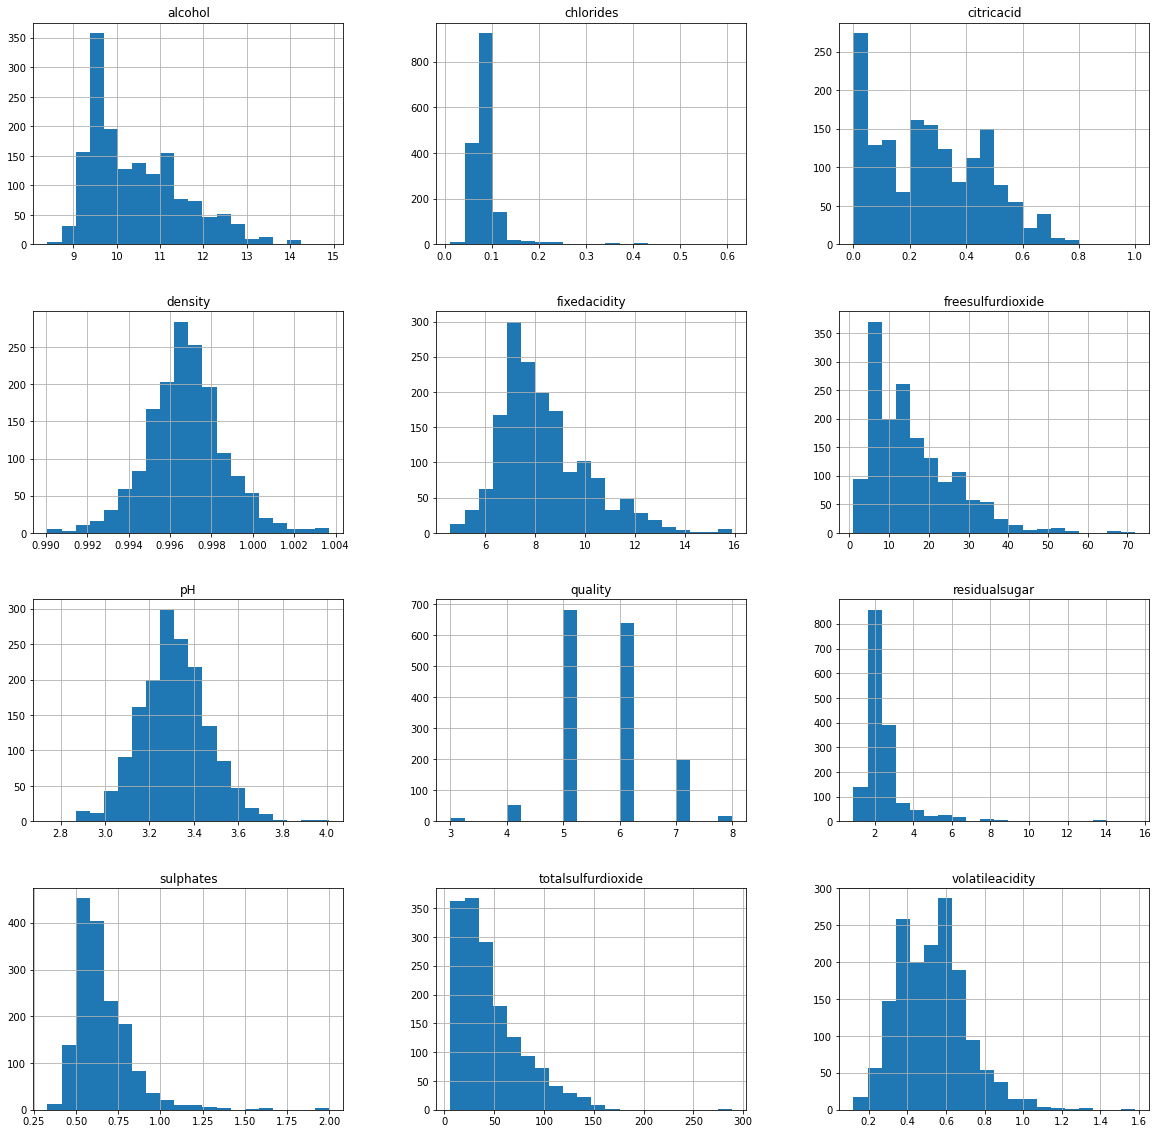

In [13]:
data.hist(bins=20, figsize=(20, 20))

### Εμφανίζουμε ενα ολοκληρομένο πλαίσιο με ολα τα γραφήματα όπου μπορούμε να τα μελετήσουμε σε σχέση με την ποιότητα αλλά και οχι μόνο. Ας αναλύσουμε κάποια απ'αυτά:
### Βλέπουμε οτι όσο μεγαλώνει το fixed acidity τόσο μεγαλώνει και το Density
### Επίσης βλέπουμε οτι σε χαμηλό fixed acidity το ph είναι μεγάλο περίπου 3.5
### Σχετικά με το alcochol παρατηρούμε οτι όσο πιο μεγάλο το αλκοόλ στο κρασί τόσο καλύτερη και η ποιότητά του

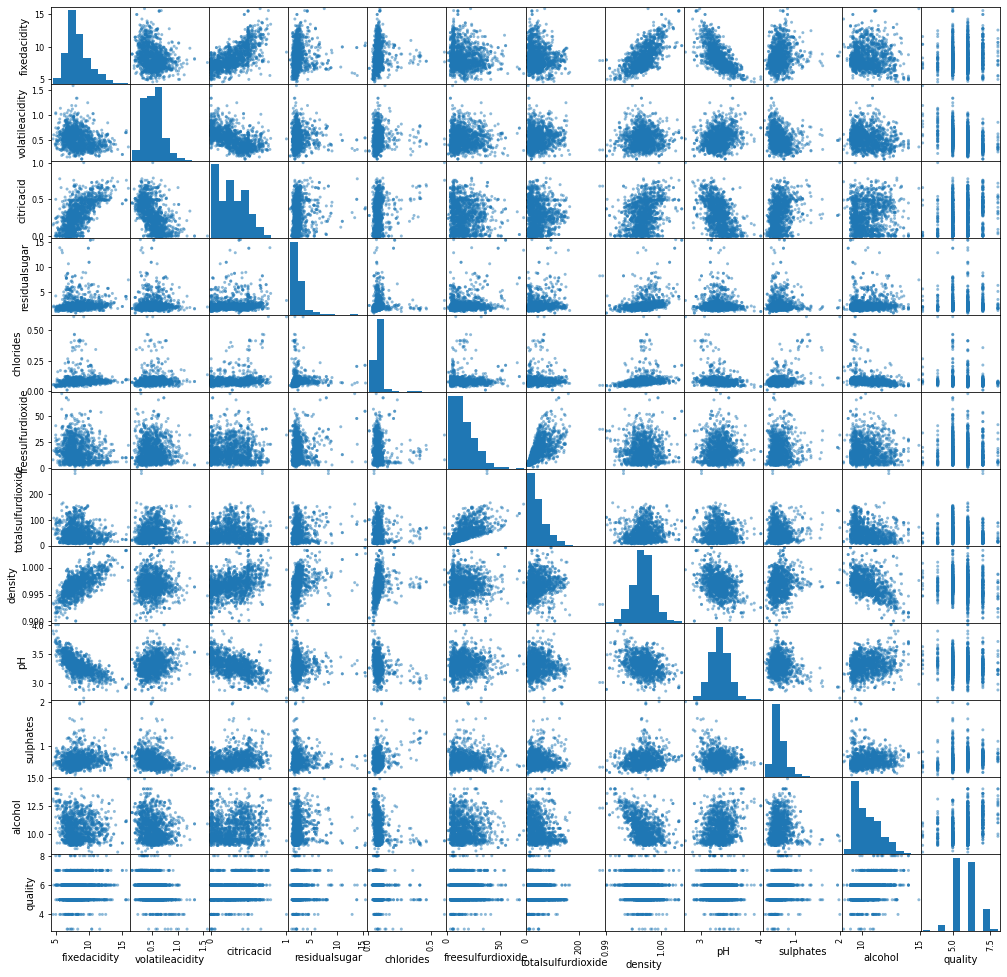

In [15]:
pd.plotting.scatter_matrix(data, figsize=(17, 17),cmap='origin');

### Παρόμοια γραφήματα με τα παραπάνω αλλά είναι χρωματισμένα με βάση την ποιότητα , όπως φαίνεται δεξιά του πλαισίου
### Για παράδειγμα μπορούμε να διακρίνουμε πως τα κρασιά που έχουν περίπου 14% αλκοόλ έχουν ποιότητα 5

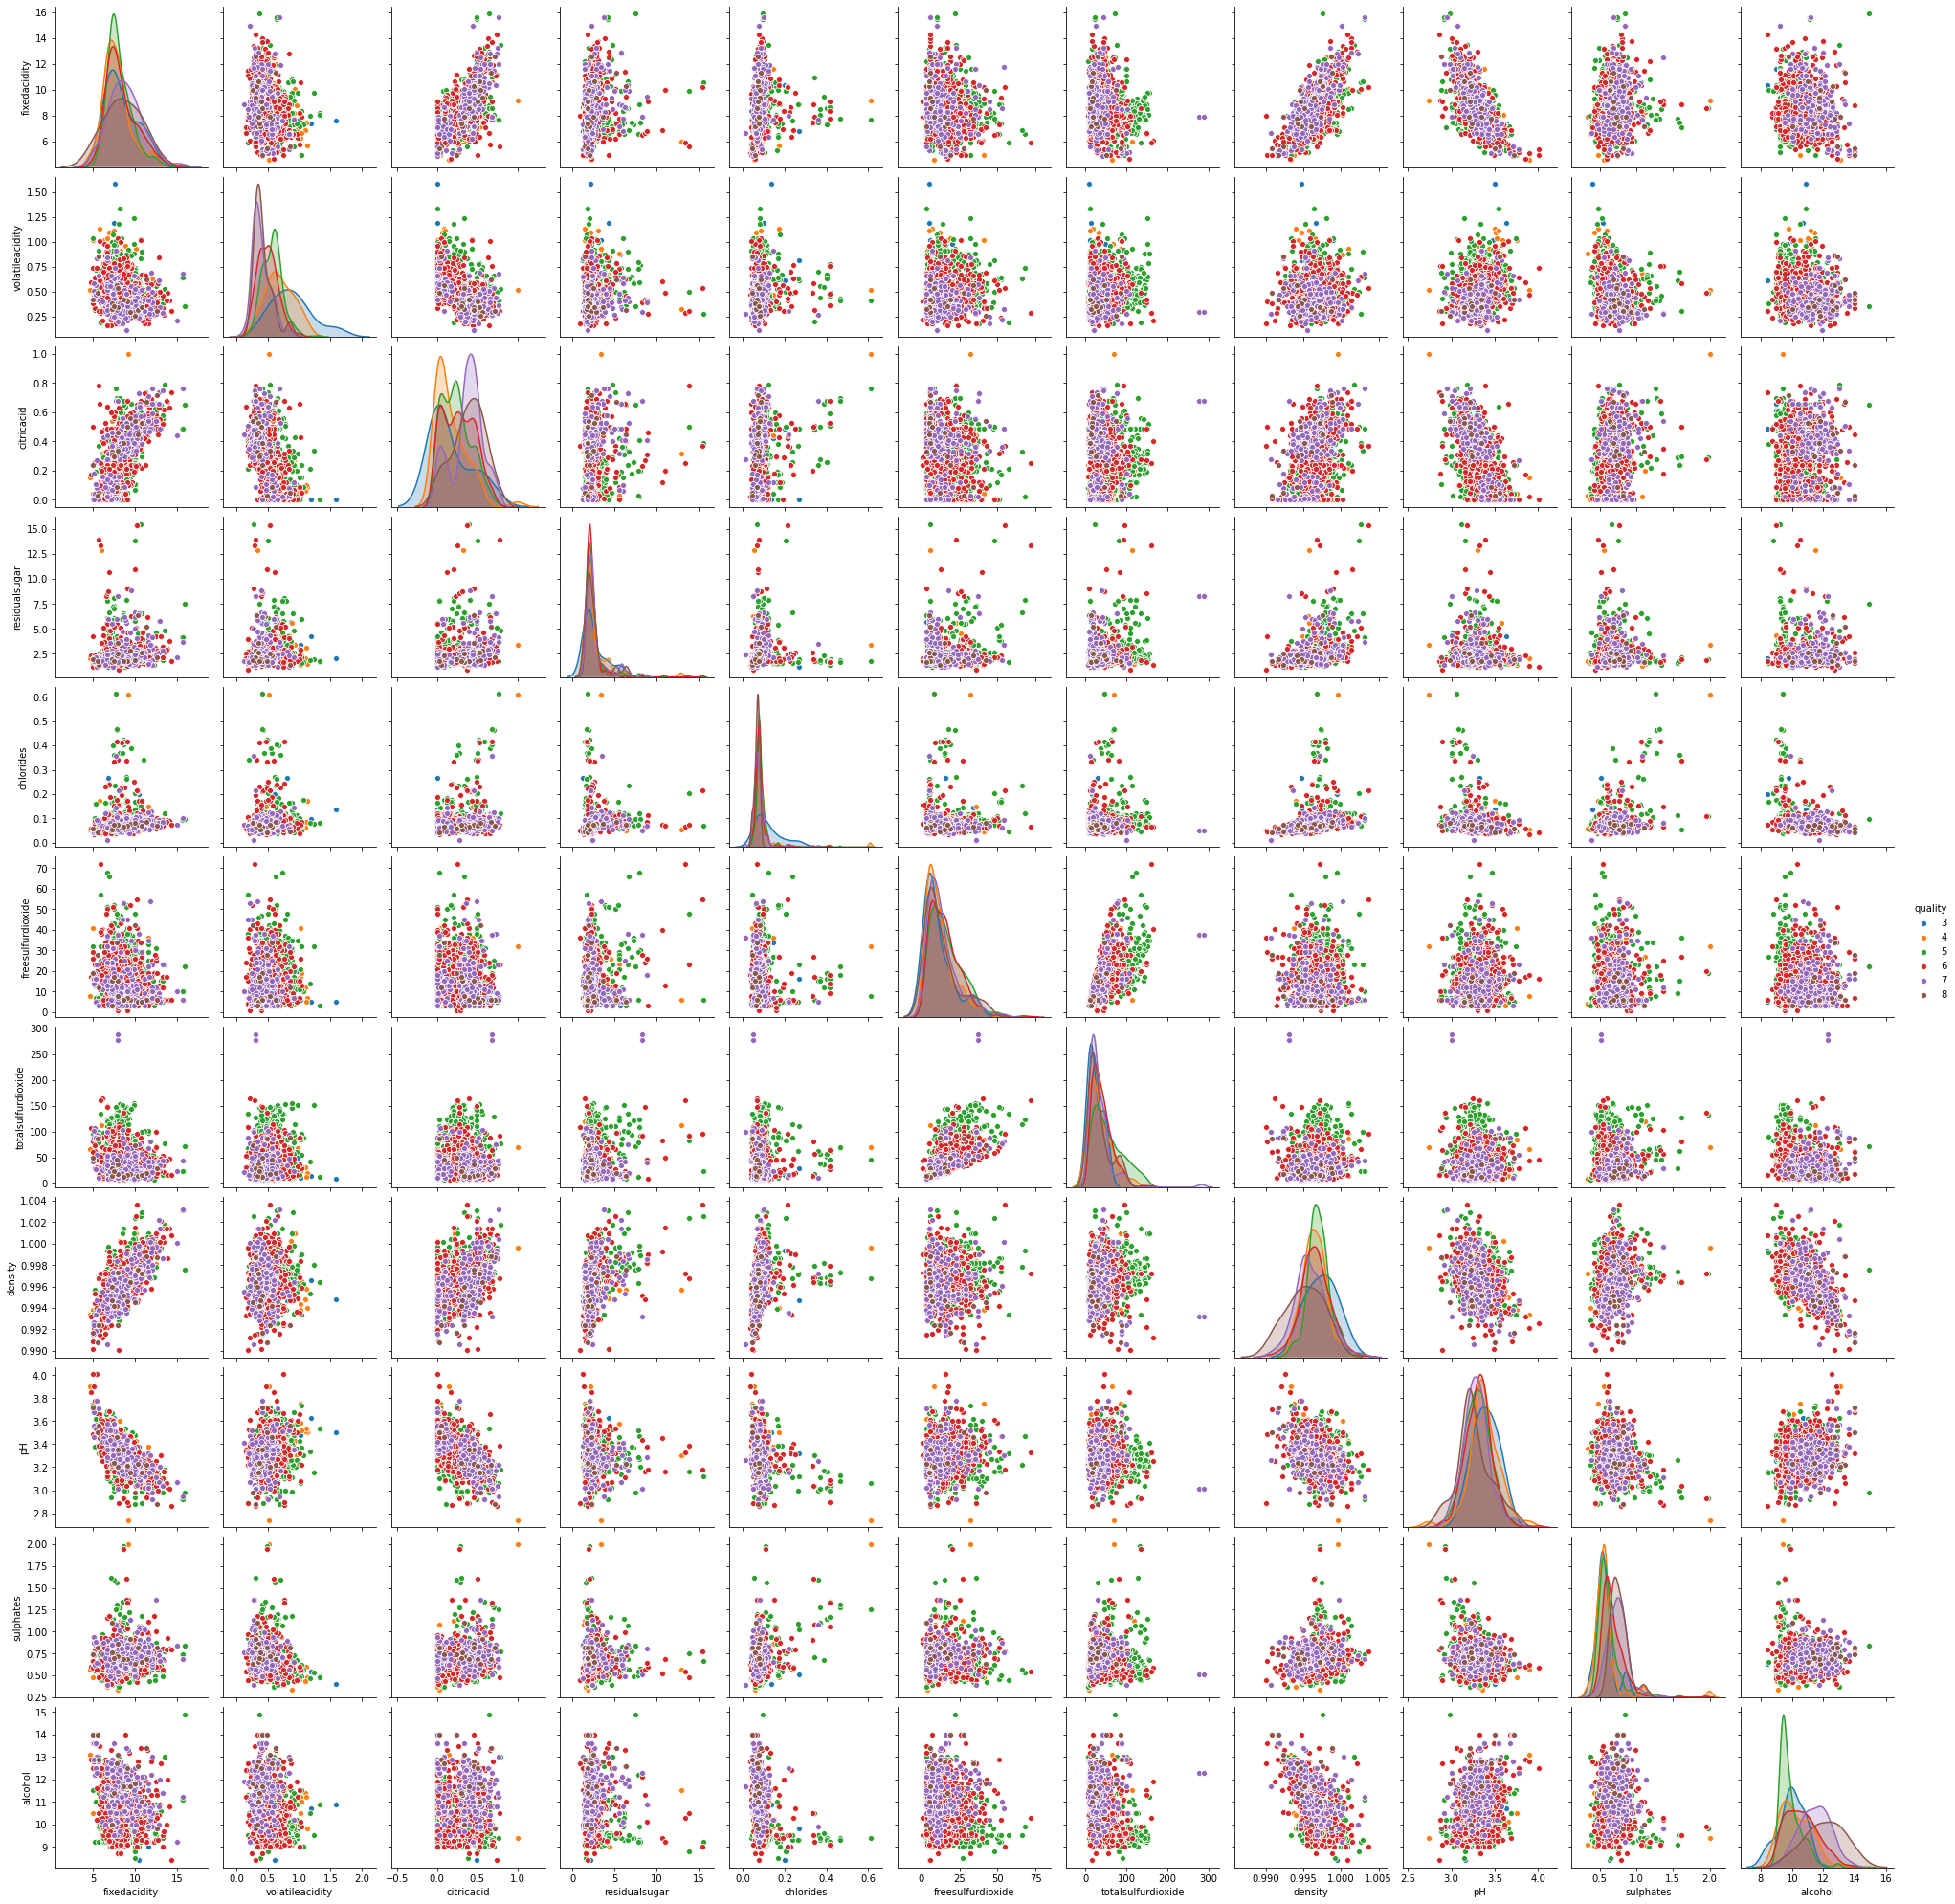

In [16]:
sns.pairplot(data,hue = 'quality')


# Τέλος Περιγραφικών και Διαγραμματικών



In [14]:
y = data['quality']
X = data[['fixedacidity' , 'volatileacidity' , 'citricacid' , 'residualsugar' , 'chlorides' , 'freesulfurdioxide', 'totalsulfurdioxide' , 'density' , 'pH' , 'sulphates',  'alcohol']]

In [15]:
X.shape 

(1599, 11)

In [16]:
y.shape

(1599,)

### Αφού βάλαμε στο Χ τα χαρακτηριστικά των κρασιών και στο Υ το quality όπου στην τελική αυτό μας ενδιαφέρει, ήρθε η ώρα να το κάνούμε train.
### Θα βάλουμε σαν αρχική τιμή για το test 0.3 και στην συνέχεια μπορούμε αν θέλουμε  να το αλλάζουμε 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

### Με βάση το 70% train και 30% test παρατηρούμε πως έχουμε 1119 κρασιά για train και 480 για test

In [18]:
print("X_train διαστάσεις:", X_train.shape)
print("y_train διαστάσεις:", y_train.shape)

print("X_test διαστάσεις:", X_test.shape)
print("y_test διαστάσεις:", y_test.shape)

X_train διαστάσεις: (1119, 11)
y_train διαστάσεις: (1119,)
X_test διαστάσεις: (480, 11)
y_test διαστάσεις: (480,)


### Η πρώτη επιλογή αλγορίθμου για να κάνω train είναι το ΔΕΝΤΡΟ ΑΠΟΦΑΣΕΩΝ.
### Είναι μια δενδροειδής δομή που με γραφικό τρόπο μπορεί να περιγράψει τα δεδομένα. Σχετικά με την δομή του, έχουμε τους κόμβους απόφασης στους οποίους αντιστοιχίζεται ενα κρητήριο διαχωρισμού(π.χ αν το ph<2.5) και τα κλαδιά αντιστοιχούν στις τιμές του κάθε χαρακτηριστικού(κόμβου)
### Ο λόγος που επιλέγω πρώτα το δέντρο απόφασης είναι επειδή πιστεύω πως θα έχω ενα καλό ποσοστό που θα μου προσφέρει το δέντρο απόφασης ύστερα απο τις απορρίψεις που κάνει οδηγόντας με σε ενα βαθμό ποιότητας
### Το Δέντρο απόφασης που χρησιμοποιήσαμε ειναι δυαδικό

In [19]:
from sklearn import tree

### H μέθοδος που χρησιμοποίησα για τον διαχωρισμό του δέντρου απόφασης είναι η μέθοδος gini. Την επέλεξα καθώς μου έδωσε καλύτερο ποσοστό επιτυχίας σε σχέση με το entropy που χρησιμοποιήσα αρχικά

In [20]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini' )

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
quality_pred = dtree.predict(X_test)

### Το κρητήριο αξιολόγησης του μοντέλου έιναι το ποσοστό επιτυχίας σχετικά με το quality όπου φαίνεται παρακάτω

In [23]:
print("Ποσοστό επιτυχίας κατηγοριοποίησης:")
print(np.sum(quality_pred == y_test) / float(len(y_test)))

Ποσοστό επιτυχίας κατηγοριοποίησης:
0.6354166666666666


### Όντως μπορούμε να παρατηρήσουμε παραπάνω οτι μου δίνει ενα καλό ποσοστό επιτυχίας ο συγκεκριμένος αλγόριθμος.
### Παρακάτω εμφανίζουμε το δέντρο απόφασης που κάναμε την πρόβλεψη όμως είναι δύσκολα διακριτό

In [63]:
#plt.figure(figsize=(150, 150));
#tree.plot_tree(dtree.fit(X_train, y_train)); 

### Ας συνεχίσουμε την κατηγοριοποίηση δοκιμάζοντας τους Κ κοντινότερους γείτονες ώστε να δούμε αν μπορούμε να πετύχουμε καλύτερο αποτέλεσμα
### Ο αλγόριθμος Κ κοντινότερων γειτόνων χρειάζεται ενα σύνολο αποθηκευμένων δεδομένων, μια μετρική απόστασης για τον υπολογισμό της απόστασης μεταξύ των δεδομένων καθώς και την τιμή του κ του αριθμού των κοντινότερων γειτόνων που θα λάβουν μέρος στην απόφαση και το οποίο το δίνουμε εμείς

In [24]:
from sklearn.neighbors import KNeighborsClassifier

### Θα πάρουμε για άρχη 5 κοντινότερους γείτονες για να βρούμε το accuracy score

In [25]:
knnClass = KNeighborsClassifier(n_neighbors=5)

In [26]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knnClass.predict(X_test)

### Το κρητήριο αξιολόγησης του μοντέλου έιναι το accuracy score σχετικά με το quality όπου φαίνεται παρακάτω

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4791666666666667

### Παρατηρούμε οτι το ποσοστό δεν είναι τόσο καλό, επομένως θα πάρουμε απο 1 μέχρι και 80 κοντινότερους γείτονες για να δούμε το καλύτερο accuracy score που μπορούμε να πετύχουμε

In [29]:
k_range = range(1, 80)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
print(scores)

[0.5875, 0.5083333333333333, 0.4895833333333333, 0.5020833333333333, 0.4791666666666667, 0.46458333333333335, 0.48541666666666666, 0.48541666666666666, 0.48125, 0.5020833333333333, 0.5104166666666666, 0.5104166666666666, 0.5104166666666666, 0.5229166666666667, 0.5166666666666667, 0.5166666666666667, 0.525, 0.5270833333333333, 0.5333333333333333, 0.5458333333333333, 0.54375, 0.54375, 0.54375, 0.5416666666666666, 0.5416666666666666, 0.5333333333333333, 0.54375, 0.5479166666666667, 0.5416666666666666, 0.5375, 0.5333333333333333, 0.5375, 0.5291666666666667, 0.5229166666666667, 0.5104166666666666, 0.5145833333333333, 0.5145833333333333, 0.5104166666666666, 0.5104166666666666, 0.5104166666666666, 0.5166666666666667, 0.50625, 0.5208333333333334, 0.5145833333333333, 0.51875, 0.5104166666666666, 0.5166666666666667, 0.5125, 0.5041666666666667, 0.5020833333333333, 0.5020833333333333, 0.5125, 0.5104166666666666, 0.5083333333333333, 0.51875, 0.5166666666666667, 0.5166666666666667, 0.510416666666666

### Δεν παρατηρήσαμε κάποιο καλό accuracy score ανάμεσα στους 80 κοντινότερους γείτονες ούτε και διακρίναμε κάποια αυξητική τάση αυτού.
### Επομένως θα πάμε και θα δούμε με το παρακάτω γράφημα με πόσους γείτονες πετύχαμε το καλύτερο αποτέσεμα

Text(0, 0.5, 'Accuracy test')

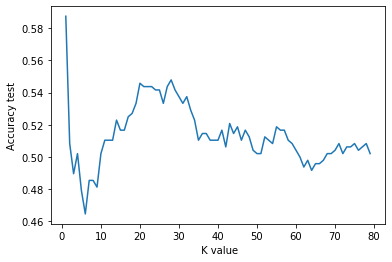

In [137]:
plt.plot(k_range, scores)
plt.xlabel(' K value')
plt.ylabel('Accuracy test')

### Το καλύτερο accuracy test απότι φαίνεται και απο το γράφημα ειναι το 0.55 περίπου και το πετύχαμε με περίπου 30 Κ κοντινότερους γείτονες

## ΣΥΜΠΕΡΑΣΜΑ

Αφού αναλύσαμε την ποιότητα του κρασιού τόσο οπτικά όσο και με δοκιμές, μπορούμε να συμπεράνουμε ότι τα φυσικοχημικά χαρακτηριστικά του κρασιού που επηρεάζουν σημαντικά την ποιότητα είναι το αλκοόλ, Θειικά, κιτρικά οξέα και πτητική οξύτητα. Συγκεκριμένα, τα κρασιά με υψηλότερο ποσοστό αλκοόλ τείνουν να είναι καλύτερης ποιότητας. Επίσης, τα κρασιά υψηλότερης ποιότητας τείνουν να έχουν λιγότερες ποσότητες πτητικών οξέων, αλλά μεσαία έως υψηλά επίπεδα θειικών και κιτρικών Οξέων. Λαμβάνοντας λεπτομέρειες για ένα κρασί μπορούμε να προβλέψουμε με ακρίβεια εάν θα είναι κάτω ή πάνω από τον μέσο όρο,αλλά οι διαφορές μεταξύ του μέσου όρου και των εξαιρετικών ή κακών κρασιών δεν εξηγείται πλήρως από τα φυσικοχημικά χαρακτηριστικά.

Η ανάλυση που πραγματοποιήθηκε έχει τους περιορισμούς της. Ένας σημαντικός παράγοντας για αυτό, είναι ότι το σύνολο δεδομένων μας παρέχει πληροφορίες που βασίζονται αποκλειστικά στα φυσικοχημικά χαρακτηριστικά κρασιών. Η ποιότητά τους επηρεάζεται από πληθώρα άλλων παραγόντων όπως την κατάσταση του εδάφους και τα θρεπτικά συστατικά, τις καιρικές συνθήκες και την ποσότητα του ήλιου. Αναλύοντας μόνο τα φυσικοχημικά χαρακτηριστικά σε αυτό το σύνολο δεδομένων, αγνοήσαμε αρκετές άλλες παραμέτρους, όπως αυτές που αναφέρονται παραπάνω επηρεάζουν την ποιότητα.